In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
#reading the data
data = pd.read_csv("SALDO_PROM.csv")

In [3]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
#the columns in data
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [5]:
#selecting the necessary columns, with numerical data
data=data[["customer_id","age","txn_description","balance","amount"]]

In [6]:
data.head()

,customer_id,age,txn_description,balance,amount
0,CUS-2487424745,26,POS,35.39,16.25
1,CUS-2487424745,26,SALES-POS,21.20,14.19
2,CUS-2142601169,38,POS,5.71,6.42
3,CUS-1614226872,40,SALES-POS,2117.22,40.90
4,CUS-2487424745,26,SALES-POS,17.95,3.25


In [7]:
#Getting the unique values for the types of transactions
print(data['txn_description'].unique())

['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']


<AxesSubplot:xlabel='txn_description', ylabel='count'>

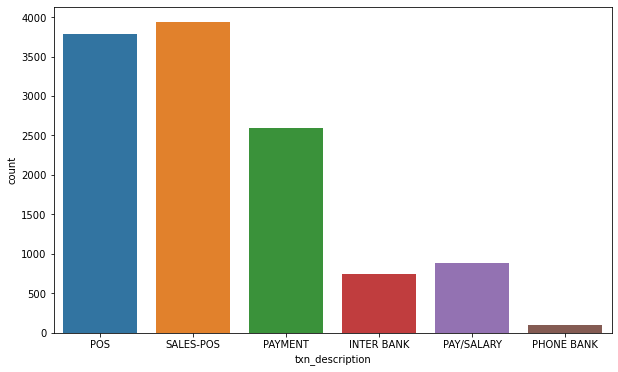

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x="txn_description", data=data)

In [9]:
plot_data= data.groupby(["customer_id"]).mean().reset_index()
plot_data.head()

,customer_id,age,balance,amount
0,CUS-1005756958,53.0,2275.852055,222.862603
1,CUS-1117979751,21.0,9829.929000,339.843700
2,CUS-1140341822,28.0,5699.212250,212.632500
3,CUS-1147642491,34.0,9032.841186,245.600169
4,CUS-1196156254,34.0,22272.433755,147.145796


In [10]:
#Finding the Salary for all the customers
salary=data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
salary=salary[["customer_id","amount"]]
salary=salary.rename(columns = {'amount':'salary'})

In [11]:
salary.head()

,customer_id,salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73


In [12]:
plot_data=pd.merge(plot_data, salary, on="customer_id")
plot_data.head()

,customer_id,age,balance,amount,salary
0,CUS-1005756958,53.0,2275.852055,222.862603,970.47
1,CUS-1117979751,21.0,9829.929000,339.843700,3578.65
2,CUS-1140341822,28.0,5699.212250,212.632500,1916.51
3,CUS-1147642491,34.0,9032.841186,245.600169,1711.39
4,CUS-1196156254,34.0,22272.433755,147.145796,3903.73


<AxesSubplot:xlabel='age', ylabel='salary'>

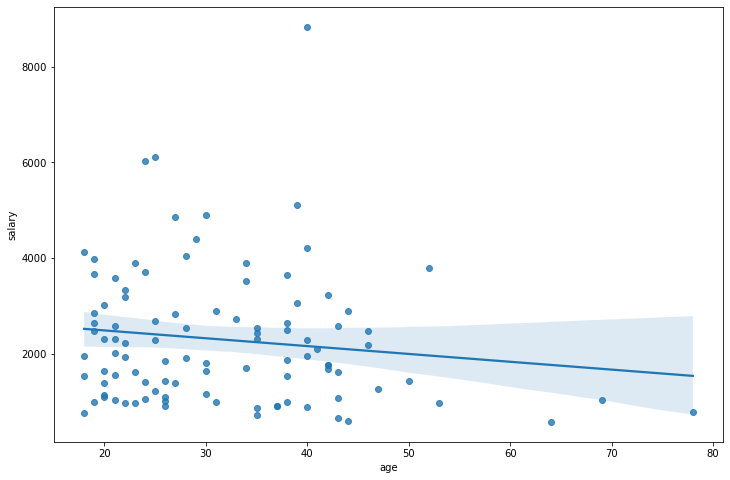

In [13]:
plt.figure(figsize=(12, 8))
sns.regplot(x="age", y="salary", data=plot_data)

<AxesSubplot:xlabel='balance', ylabel='salary'>

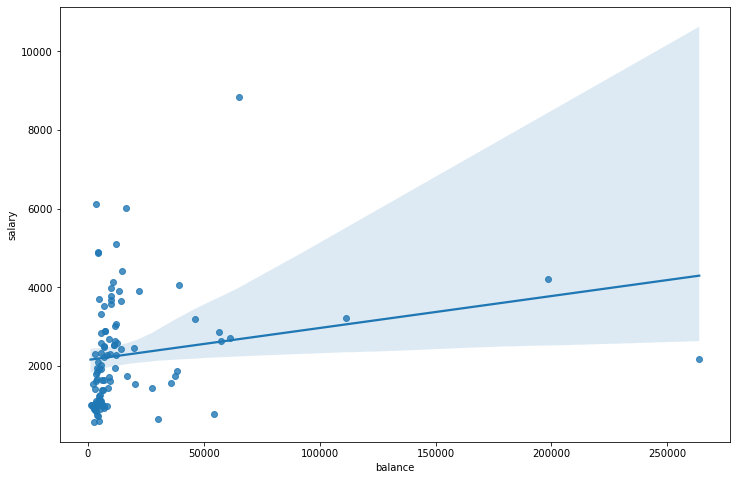

In [14]:
plt.figure(figsize=(12, 8))
sns.regplot(x="balance",y= "salary", fit_reg=True, data=plot_data)

<AxesSubplot:xlabel='amount', ylabel='salary'>

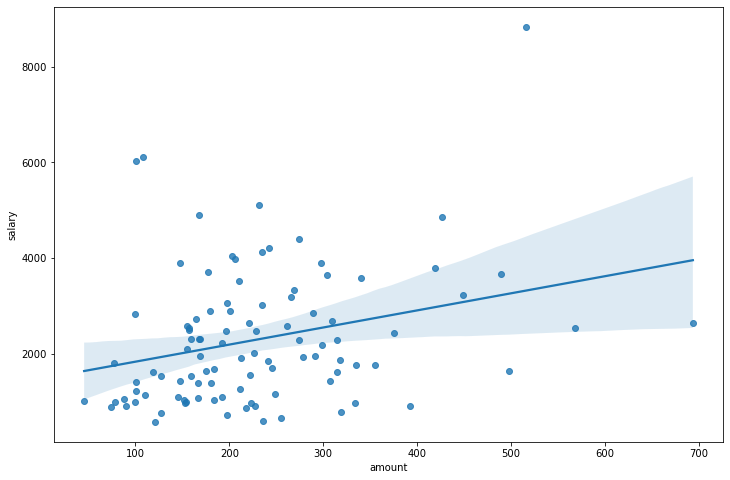

In [15]:
plt.figure(figsize=(12, 8))
sns.regplot(x="amount",y= "salary", fit_reg=True, data=plot_data)

In [16]:
#POS indicates transaction made at any business or such, thus it reflects spending behaviour of customer
pos=data[data["txn_description"]==("POS"or"SALES-POS")].groupby("customer_id").mean().reset_index()
pos=pos[["customer_id","amount"]]
pos=pos.rename(columns = {'amount':'pos'})

In [17]:
pos.head()

,customer_id,pos
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432


In [18]:
len(pos)

100

In [19]:
#Bills and payments made by customer
payment=data[data["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
payment=payment[["customer_id","amount"]]
payment=payment.rename(columns = {'amount':'payment'})

In [20]:
payment.head()

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000


In [21]:
len(payment)

100

In [22]:
#Bills and payments made by customer
inter_bank=data[data["txn_description"]=="INTER BANK"].groupby("customer_id").mean().reset_index()
inter_bank=inter_bank[["customer_id","amount"]]
inter_bank=inter_bank.rename(columns = {'amount':'inter_bank'})

In [23]:
inter_bank.head()

,customer_id,inter_bank
0,CUS-1117979751,1001.0000
1,CUS-1140341822,90.0000
2,CUS-1147642491,125.0000
3,CUS-1196156254,153.4000
4,CUS-1271030853,76.1875


In [24]:
len(inter_bank)

68

In [25]:
#Banking via phone/online pay
phonebank=data[data["txn_description"]=='PHONE BANK'].groupby("customer_id").mean().reset_index()
phonebank=phonebank[["customer_id","amount"]]
phonebank=phonebank.rename(columns = {'amount':'phonebank'})

In [26]:
phonebank.head()

,customer_id,phonebank
0,CUS-1005756958,182.0
1,CUS-1646183815,150.0
2,CUS-1896554896,1916.0
3,CUS-2155701614,82.0
4,CUS-2348881191,1629.0


In [27]:
len(phonebank)

16

In [28]:
customer=data.groupby("customer_id").mean().reset_index()
customer=customer[["customer_id","age","balance"]]
df=pd.merge(customer, payment, on="customer_id")
df=pd.merge(df, pos, on="customer_id")
df=pd.merge(df, salary, on="customer_id")

In [29]:
df.head()

,customer_id,age,balance,payment,pos,salary
0,CUS-1005756958,53.0,2275.852055,144.000000,28.769615,970.47
1,CUS-1117979751,21.0,9829.929000,98.925000,23.321923,3578.65
2,CUS-1140341822,28.0,5699.212250,142.000000,34.781282,1916.51
3,CUS-1147642491,34.0,9032.841186,96.185185,54.271316,1711.39
4,CUS-1196156254,34.0,22272.433755,43.100000,31.157432,3903.73


<AxesSubplot:xlabel='payment', ylabel='salary'>

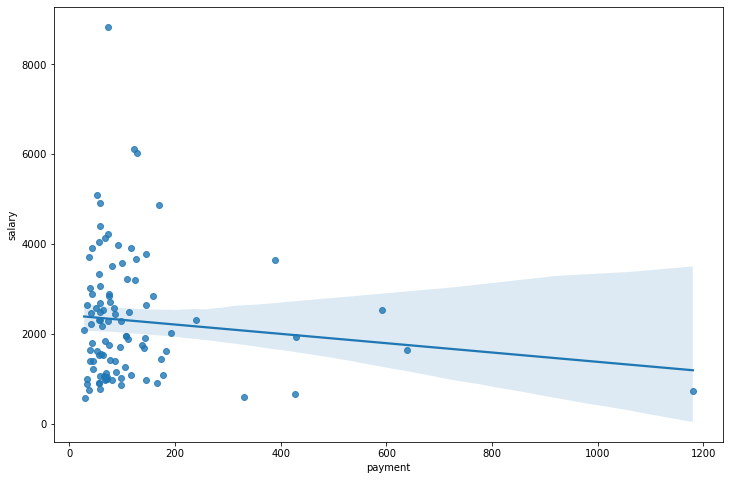

In [30]:
plt.figure(figsize=(12, 8))
sns.regplot(x="payment",y= "salary", fit_reg=True, data=df)

<AxesSubplot:xlabel='pos', ylabel='salary'>

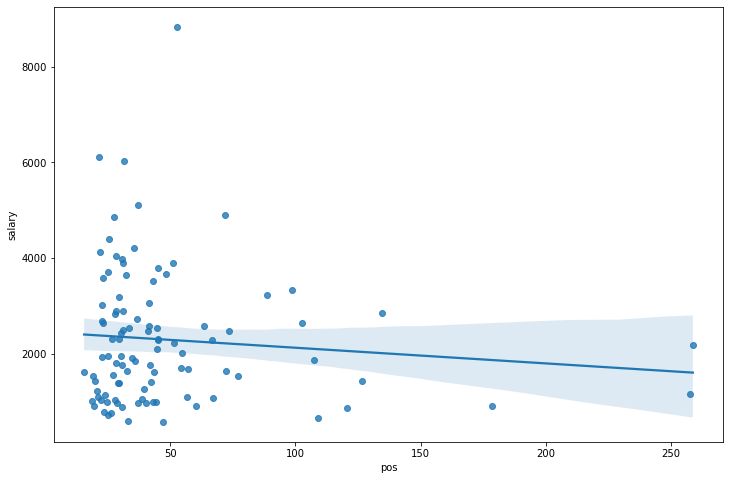

In [31]:
plt.figure(figsize=(12, 8))
sns.regplot(x="pos",y= "salary", fit_reg=True, data=df)

In [32]:
#Defining the X and y of machine learning
X=df[["age","balance","payment","pos"]].values
y=df["salary"].values

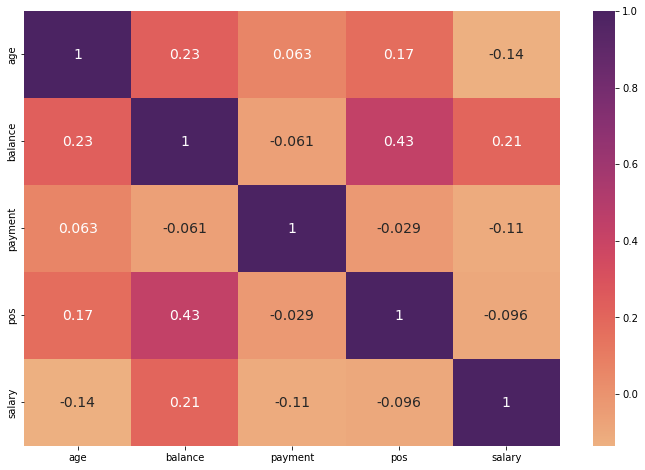

In [33]:
#Trazamos el gráfico de correlación (esto es una medida de la fuerta y tipo de asociación lineal entre variables numéricas)
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = df.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

In [34]:
#Train,Test splitting
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [35]:
#Linear Regression model
lr = LinearRegression()

In [36]:
#Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
#Prediction using
y_pred=lr.predict(X_test)

In [38]:
#r2 score
print('Coefficient of determination: ', r2_score(y_test, y_pred))

Coefficient of determination:  0.07666219584715872


In [39]:
#Here we make a sample prediction
#age=50
#balance=5000
#payment=100
#pos=50
#age in years and financial values in Australian Dollar
print("The model predicts salary will be=")
print(lr.predict([[60,5000,100,50]])[0])

The model predicts salary will be=
1467.1295983855503


In [40]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.5406165067731867

In [41]:
# Revisamos el error asociado
print("El error cuadrático medio es {}".format(mean_squared_error(y_test, y_pred)))

El error cuadrático medio es 2049359.2075327095


In [42]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print("      age,          balance,          payment,          pos")
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
      age,          balance,          payment,          pos
[-2.27770373e+01  1.22027639e-02 -7.78315370e-01 -6.07930272e+00]
Valor de la intersección o coeficiente "b":
3154.534690478974


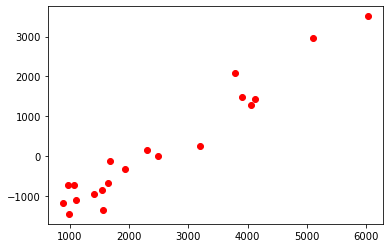

In [43]:
#¿Como seran los residuos del modelo?
residuo = y_test-y_pred

# ¿Habra algun patron grafico?
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, residuo, color= 'r')
plt.show()

In [44]:
#decision tree regressor
dt = DecisionTreeRegressor()

In [45]:
#fitting the model
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
#prediction of test values
y_pred_2 = dt.predict(X_test)
print(y_pred_2)

[ 916.75 2538.68 3517.61 2572.91 3071.14 3649.51 1916.51  917.45 2280.36
 1272.47  576.   2500.   3026.95 2538.68 3676.94 2718.51 2023.68 3676.94
 4910.9  3517.61]


In [47]:
#Here we make a sample prediction
#age=50
#balance=5000
#payment=100
#pos=50
#age in years and financial values in Australian Dollar
print("The model predicts salary will be=")
print(dt.predict([[60,5000,100,50]])[0])

The model predicts salary will be=
916.75


In [48]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred_2)

0.6231176340196496

In [49]:
# Revisamos el error asociado
print("El error cuadrático medio es {}".format(mean_squared_error(y_test, y_pred_2)))

El error cuadrático medio es 2230306.3059549998


In [50]:
df_2=df

In [51]:
df_2=df_2[df_2["salary"]<6000]

In [52]:
len(df_2)

97

In [53]:
df_2=df_2[df_2["age"]<60]

In [54]:
len(df_2)

94

In [55]:
df_2=df_2[df_2["balance"]<100000]

In [56]:
len(df_2)

91

In [57]:
df_2=df_2[df_2["payment"]<500]

In [58]:
len(df_2)

88

In [59]:
df_2=df_2[df_2["pos"]<160]

In [60]:
len(df_2)

86

In [61]:
#Defining the X and y of machine learning
X=df_2[["age","balance","payment","pos"]].values
y=df_2["salary"].values

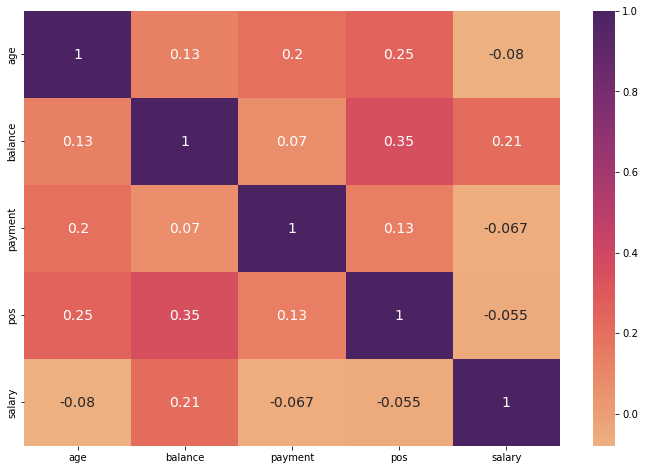

In [62]:
#Trazamos el gráfico de correlación (esto es una medida de la fuerta y tipo de asociación lineal entre variables numéricas)
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = df_2.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

<AxesSubplot:xlabel='age', ylabel='salary'>

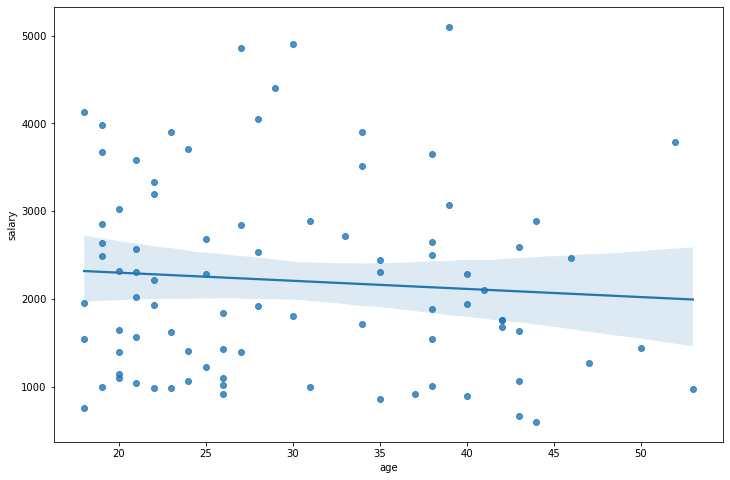

In [63]:
plt.figure(figsize=(12, 8))
sns.regplot(x="age",y= "salary", fit_reg=True, data=df_2)

<AxesSubplot:xlabel='balance', ylabel='salary'>

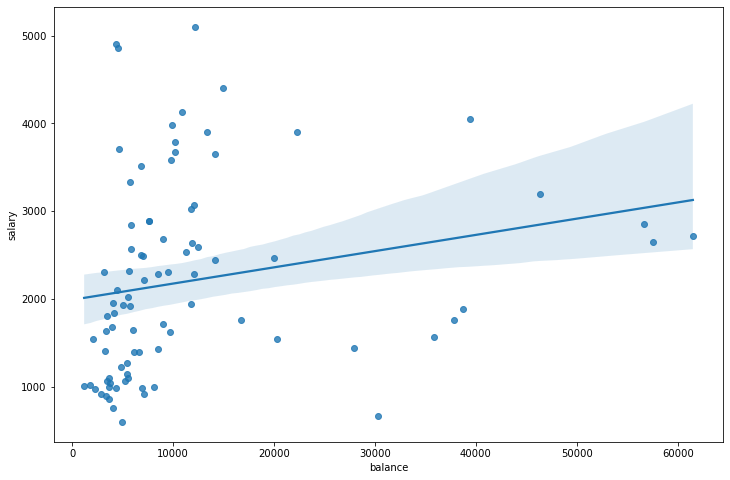

In [64]:
plt.figure(figsize=(12, 8))
sns.regplot(x="balance",y= "salary", fit_reg=True, data=df_2)

<AxesSubplot:xlabel='payment', ylabel='salary'>

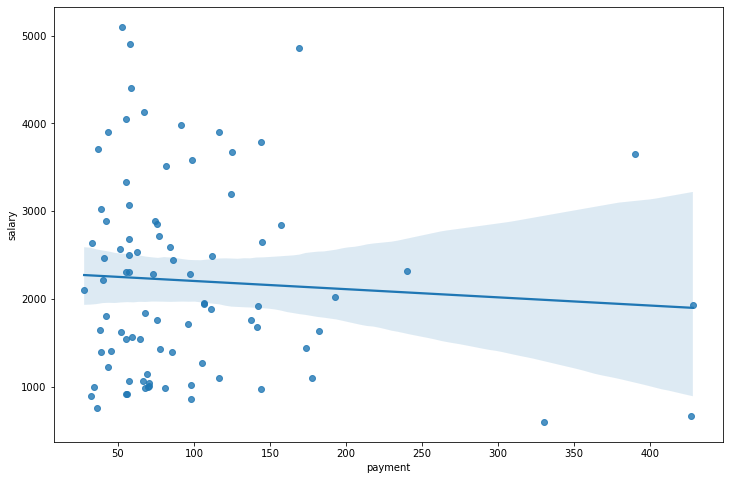

In [65]:
plt.figure(figsize=(12, 8))
sns.regplot(x="payment",y= "salary", fit_reg=True, data=df_2)

<AxesSubplot:xlabel='pos', ylabel='salary'>

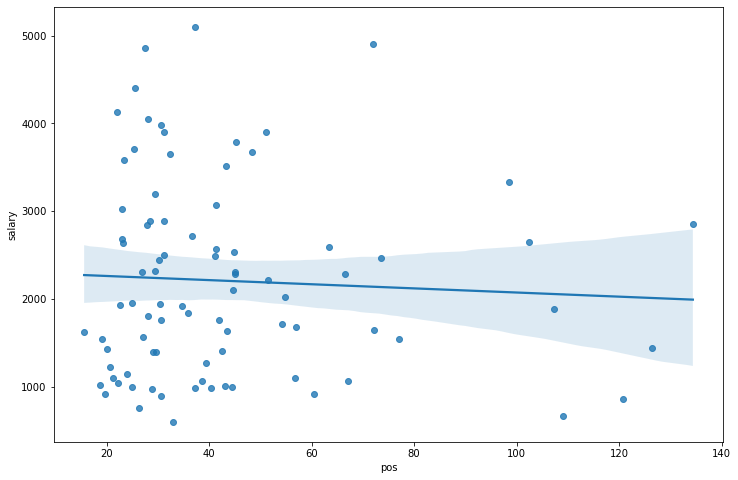

In [66]:
plt.figure(figsize=(12, 8))
sns.regplot(x="pos",y= "salary", fit_reg=True, data=df_2)

In [67]:
#Train,Test splitting
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [68]:
#Linear Regression model
#usar fit_intercept=False para intercepto = 0
lr = LinearRegression()


In [69]:
#Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
#Prediction using
y_pred=lr.predict(X_test)

In [71]:
#r2 score
print('Coefficient of determination: ', r2_score(y_test, y_pred))

Coefficient of determination:  0.023268467364608747


In [72]:
#Here we make a sample prediction
#age=50
#balance=5000
#payment=100
#pos=50
#age in years and financial values in Australian Dollar
print("The model predicts salary will be=")
print(lr.predict([[60,5000,100,50]])[0])


The model predicts salary will be=
1704.5964948088977


In [73]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)


0.4750101078835471

In [74]:
# Revisamos el error asociado
print("El error cuadrático medio es {}".format(mean_squared_error(y_test, y_pred)))

El error cuadrático medio es 1336505.546787661


In [75]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print("      age,     balance,     payment,      pos")
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)


DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
      age,     balance,     payment,      pos
[-9.35149269  0.02271269 -1.26417413 -6.84888949]
Valor de la intersección o coeficiente "b":
2620.984515987778


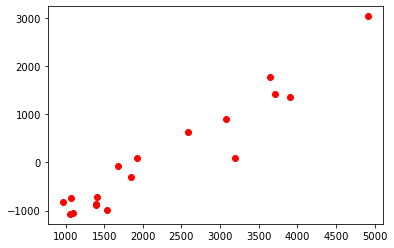

In [76]:
#¿Como seran los residuos del modelo?
residuo = y_test-y_pred

# ¿Habra algun patron grafico?
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, residuo, color= 'r')
plt.show()

In [77]:
#decision tree regressor
dt = DecisionTreeRegressor()


In [78]:
#fitting the model
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [79]:
#prediction of test values
y_pred_2 = dt.predict(X_test)
print(y_pred_2)

[ 761.33 4863.62 1272.47 5103.51 5103.51 2886.52 1808.62 2320.3  2470.45
 2718.51  982.71 1808.62 2280.36  917.45 4863.62 4863.62 1560.2   982.71]


In [80]:
#Here we make a sample prediction
#age=50
#balance=5000
#payment=100
#pos=50
#age in years and financial values in Australian Dollar
print("The model predicts salary will be=")
print(dt.predict([[60,5000,100,50]])[0])


The model predicts salary will be=
1002.13


In [81]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred_2)


0.8794639781963659

In [82]:
# Revisamos el error asociado
print("El error cuadrático medio es {}".format(mean_squared_error(y_test, y_pred_2)))


El error cuadrático medio es 4190280.356661111


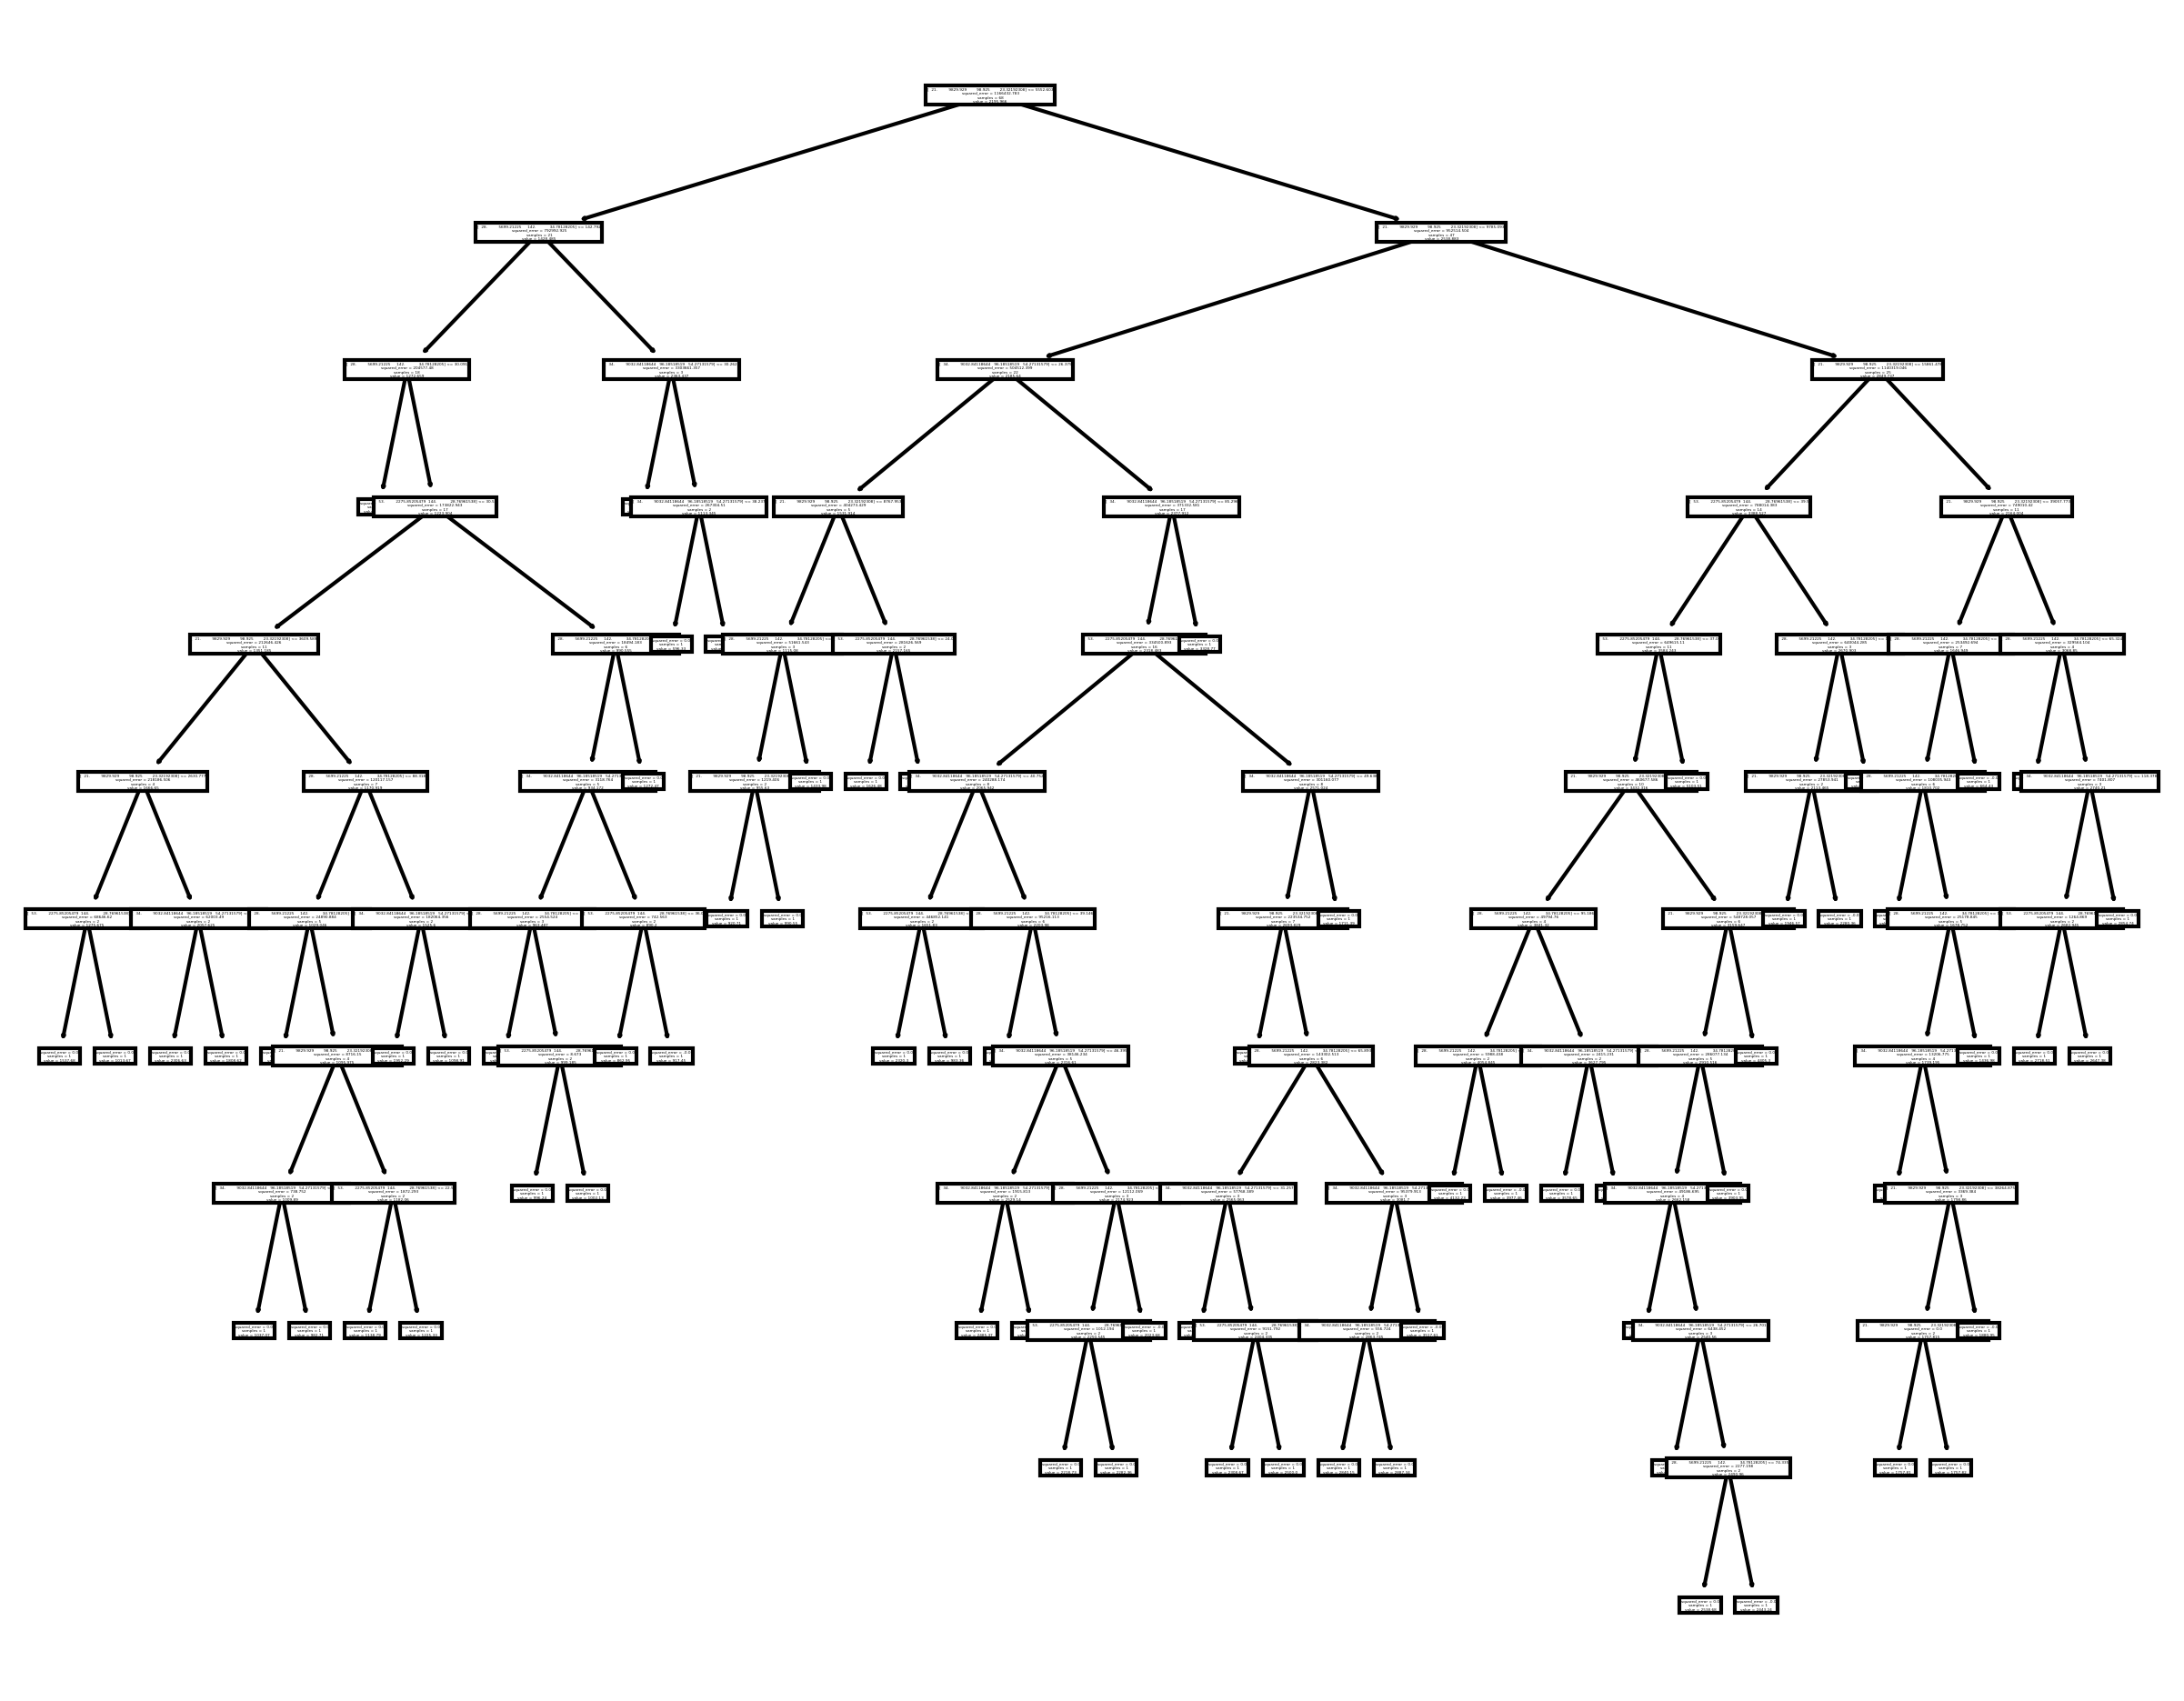

In [83]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=300)
plot_tree(dt, feature_names=X);